In [1]:
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from savitzky_golay import savitzky_golay

In [2]:
# omar's beto
omarbeto = pd.read_csv('output/training_nli_beto-2022-03-23_17-57-01/eval/similarity_evaluation_sts-dev_results.csv')
omarbeto_res = omarbeto.drop(columns='steps').groupby('epoch').mean()
best = omarbeto_res.values.sum(axis=1).argmax()
omarbeto_best = omarbeto.drop(columns='steps').groupby('epoch').mean().loc[best]
omarbeto_best.name = 'omarbeto'

In [3]:
# bertin-stsv2
bertinv2 = pd.read_csv('bertin-stsv2/eval/similarity_evaluation_sts-test_results.csv')
best = bertinv2.drop(columns='steps').groupby('epoch').mean().sum(axis=1).argmax()
bertinv2_best = bertinv2.drop(columns='steps').groupby('epoch').mean().loc[best]
bertinv2_best.name = 'bertin'

In [4]:
# bertin-stsv2-cls
bertinhnli = pd.read_csv('bertin-stsv2-cls/eval/similarity_evaluation_sts-test_results.csv')
best = bertinhnli.drop(columns='steps').groupby('epoch').mean().values.sum(axis=1).argmax()
bertinv2_cls_best = bertinhnli.drop(columns='steps').groupby('epoch').mean().loc[best]
bertinv2_cls_best.name = 'bertin-cls'

In [21]:
# bertin-stsv2-nodense
bertinhnli = pd.read_csv('bertin-stsv2-nodense/eval/similarity_evaluation_sts-test_results.csv')
best = bertinhnli.drop(columns='steps').groupby('epoch').mean().values.sum(axis=1).argmax()
bertinv2_nodense_best =bertinhnli.drop(columns='steps').groupby('epoch').mean().loc[best]
bertinv2_nodense_best.name = 'bertin-nodense'
print(best)

0


In [6]:
# bertin-stsv2-nodense-cls
bertinhnli = pd.read_csv('bertin-stsv2-nodense-cls/eval/similarity_evaluation_sts-test_results.csv')
best = bertinhnli.drop(columns='steps').groupby('epoch').mean().values.sum(axis=1).argmax()
bertinv2_nodense_cls_best =bertinhnli.drop(columns='steps').groupby('epoch').mean().loc[best]
bertinv2_nodense_cls_best.name = 'bertin-nodense-cls'

In [7]:
res = pd.concat([
        omarbeto_best,
        bertinv2_best,
        bertinv2_cls_best,
        bertinv2_nodense_best,
        bertinv2_nodense_cls_best
      ], axis=1)

res['argmax'] = res.values.argmax(axis=1)
res

,omarbeto,bertin,bertin-cls,bertin-nodense,bertin-nodense-cls,argmax
cosine_pearson,0.609803,0.669326,0.670681,0.683188,0.674987,3
cosine_spearman,0.528776,0.596159,0.598005,0.615916,0.608692,3
euclidean_pearson,0.590613,0.665561,0.670832,0.672601,0.667151,3
euclidean_spearman,0.526529,0.600940,0.607471,0.611539,0.608218,3
manhattan_pearson,0.589108,0.665463,0.670523,0.672040,0.666582,3
manhattan_spearman,0.525910,0.600947,0.606704,0.610517,0.607016,3
dot_pearson,0.544078,0.600923,0.644473,0.600517,0.669318,4
dot_spearman,0.460427,0.517005,0.561096,0.521260,0.603300,4


Text(0, 0.5, 'Loss0')

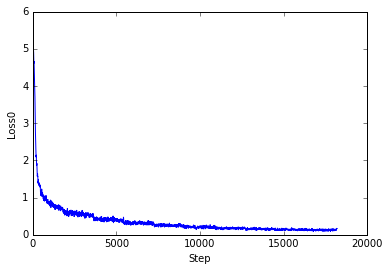

In [8]:
with open(os.path.join('bertin-stsv2-cls','loss_digest.json')) as fl:
    historic_loss = json.load(fl)
    
#hloss, ltype = np.log(np.array(historic_loss['0'])), 'log '  # <--- log domain
hloss, ltype = np.array(historic_loss['0']), ''  # <--- dominio clasico
hloss = savitzky_golay(hloss, 53, 4)
plt.plot(range(len(historic_loss['0'])), hloss)
plt.xlabel('Step')
plt.ylabel(ltype+'Loss0')
#plt.legend('Loss0', ncol=2, loc='upper left');

Text(0, 0.5, 'Loss0')

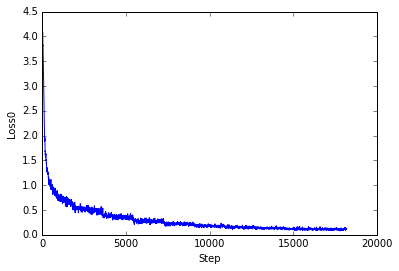

In [9]:
with open(os.path.join('bertin-stsv2-nodense','loss_digest.json')) as fl:
    historic_loss = json.load(fl)
    
#hloss, ltype = np.log(np.array(historic_loss['0'])), 'log '  # <--- log domain
hloss, ltype = np.array(historic_loss['0']), ''  # <--- dominio clasico
hloss = savitzky_golay(hloss, 53, 4)
plt.plot(range(len(historic_loss['0'])), hloss)
plt.xlabel('Step')
plt.ylabel(ltype+'Loss0')
#plt.legend('Loss0', ncol=2, loc='upper left');

In [10]:
omarbeto_res = omarbeto.drop(columns='steps').groupby('epoch').mean()
bertinhnli_res = bertinhnli.drop(columns='steps').groupby('epoch').mean()
bertinv2_res = bertinv2.drop(columns='steps').groupby('epoch').mean()

best_omarbeto = omarbeto_res.values.sum(axis=1).argmax()
best_bertinhnli = bertinhnli_res.values.sum(axis=1).argmax()
best_bertinv2 = bertinv2_res.values.sum(axis=1).argmax()

print('Best Omar Beto:', best_omarbeto)
print('Best Bertin Huge NLI:', best_bertinhnli)
print('Best Bertin V2:', best_bertinv2)

Best Omar Beto: 19
Best Bertin Huge NLI: 1
Best Bertin V2: 1


In [11]:
omarbeto_best = omarbeto.drop(columns='steps').groupby('epoch').mean().loc[best_omarbeto]
bertinhnli_best = bertinhnli.drop(columns='steps').groupby('epoch').mean().loc[best_bertinhnli]

(bertinhnli_best / omarbeto_best)*100 - 100

cosine_pearson        10.689467
cosine_spearman       15.113284
euclidean_pearson     12.958977
euclidean_spearman    15.514639
manhattan_pearson     13.151024
manhattan_spearman    15.421902
dot_pearson           23.018668
dot_spearman          31.030531
dtype: float64

In [26]:
improv = (bertinv2_nodense_best / omarbeto_best)*100 - 100

In [27]:
omarbeto_best.name = 'BETO STS'
bertinv2_nodense_best.name = 'BERTIN STS'
pd.concat([omarbeto_best, bertinv2_nodense_best, improv], axis=1)

,BETO STS,BERTIN STS,0
cosine_pearson,0.609803,0.683188,12.034386
cosine_spearman,0.528776,0.615916,16.479504
euclidean_pearson,0.590613,0.672601,13.881723
euclidean_spearman,0.526529,0.611539,16.145474
manhattan_pearson,0.589108,0.672040,14.077524
manhattan_spearman,0.525910,0.610517,16.087698
dot_pearson,0.544078,0.600517,10.373192
dot_spearman,0.460427,0.521260,13.212257


In [25]:
0.683188/0.609803 * 100

112.03421432823389